# Comparação de Conversores Isolados Push Pull e Forward

|Freq| D |Ns/Np|Lm (2º)|Lx|C|R|
|:--:|:-:|:--:|:-:|:-------:|:---------:|:-----------:|
|2 k |0.4|0.15|3 m| 40 $\mu$| 78.1 $\mu$| 4.8 $\Omega$|

In [23]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

from PyLTSpice import RawRead

## Análise Gráfica

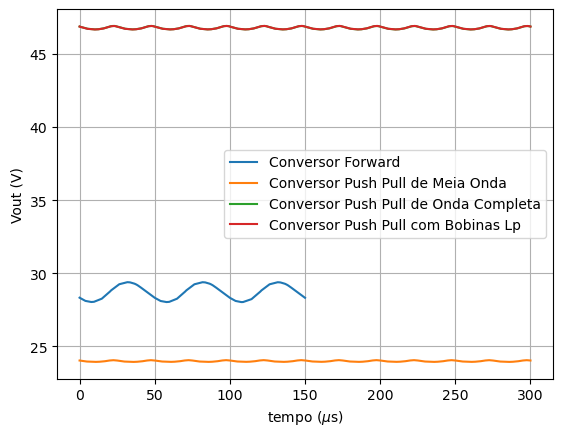

In [24]:
Forw_raw = RawRead("Input Files/Forward Converter.raw")
Half_raw = RawRead("Input Files/Push Pull - Meia Onda.raw")
Full_raw = RawRead("Input Files/Push Pull - Onda Completa.raw")
Push_raw = RawRead("Input Files/Push Pull.raw")

time_Forw = 1e6*Forw_raw.get_trace("time").get_wave()
Vout_Forw = Forw_raw.get_trace("V(Vout)").get_wave()

time_Half = 1e6*Half_raw.get_trace("time").get_wave()
Vout_Half = Half_raw.get_trace("V(Vout)").get_wave()

time_Full = 1e6*Full_raw.get_trace("time").get_wave()
Vout_Full = Full_raw.get_trace("V(Vout)").get_wave()

time_Push = 1e6*Push_raw.get_trace("time").get_wave()
Vout_Push = Push_raw.get_trace("V(Vout)").get_wave()

plt.plot(time_Forw, Vout_Forw)
plt.plot(time_Half, Vout_Half)
plt.plot(time_Full, Vout_Full)
plt.plot(time_Push, Vout_Push)

plt.legend(["Conversor Forward", "Conversor Push Pull de Meia Onda",
            "Conversor Push Pull de Onda Completa", "Conversor Push Pull com Bobinas Lp"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()

## Separando em Grupos Para Análise

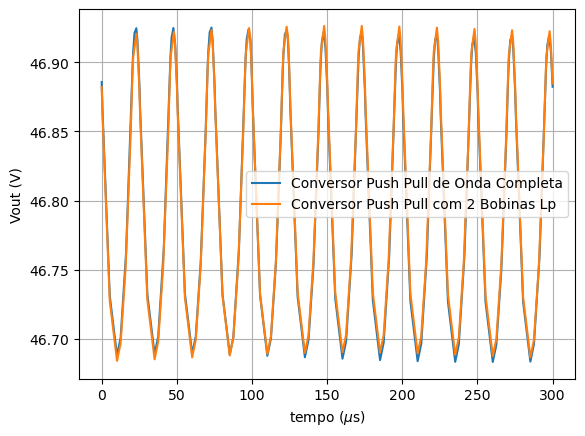

In [25]:
plt.plot(time_Full, Vout_Full)
plt.plot(time_Push, Vout_Push)

plt.legend(["Conversor Push Pull de Onda Completa", "Conversor Push Pull com 2 Bobinas Lp"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()

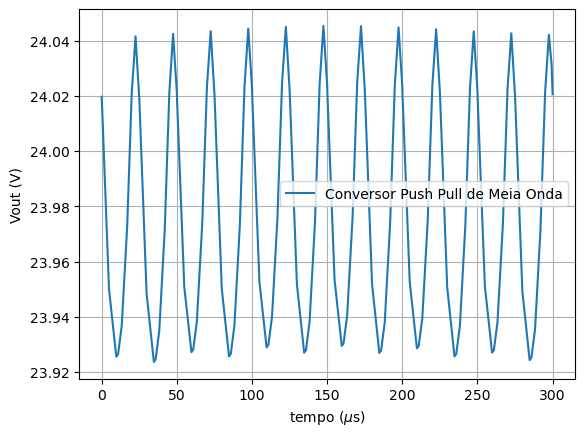

In [26]:
plt.plot(time_Half, Vout_Half)

plt.legend(["Conversor Push Pull de Meia Onda"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()

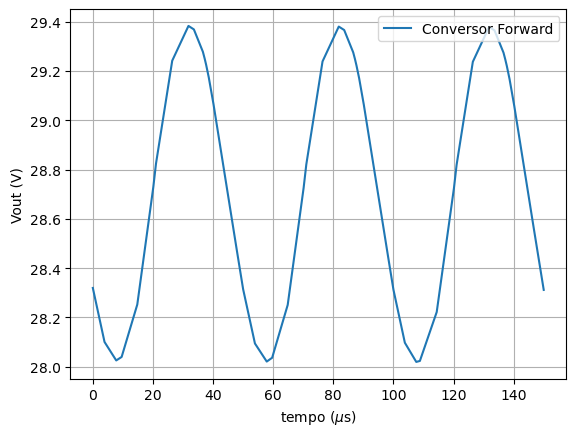

In [27]:
plt.plot(time_Forw, Vout_Forw)

plt.legend(["Conversor Forward"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()

## Comparação Entre Variações de Tensão e Corrente

In [28]:
dv_Forw = 100*(np.max(Vout_Forw) - np.min(Vout_Forw))/np.average(Vout_Forw)
dv_Half = 100*(np.max(Vout_Half) - np.min(Vout_Half))/np.average(Vout_Half)
dv_Full = 100*(np.max(Vout_Full) - np.min(Vout_Full))/np.average(Vout_Full)
dv_Push = 100*(np.max(Vout_Push) - np.min(Vout_Push))/np.average(Vout_Push)

dv = [dv_Forw, dv_Half, dv_Full, dv_Push]
print(dv)

[4.733524582972602, 0.5070319303217077, 0.5154972704778863, 0.5163107194517514]


In [29]:
Ix_Forw = Forw_raw.get_trace("I(Lx)").get_wave()
Ix_Half = Half_raw.get_trace("I(Lx)").get_wave()
Ix_Full = Full_raw.get_trace("I(Lx)").get_wave()
Ix_Push = Push_raw.get_trace("I(Lx)").get_wave()

dix_Forw = 100*(np.max(Ix_Forw) - np.min(Ix_Forw))/np.average(Ix_Forw)
dix_Half = 100*(np.max(Ix_Half) - np.min(Ix_Half))/np.average(Ix_Half)
dix_Full = 100*(np.max(Ix_Full) - np.min(Ix_Full))/np.average(Ix_Full)
dix_Push = 100*(np.max(Ix_Push) - np.min(Ix_Push))/np.average(Ix_Push)

dix = [dix_Forw, dix_Half, dix_Full, dix_Push]
print(dix)

[-1205.1876228502333, 60.271921867872905, 58.329271177804124, 59.882086835356105]


## Ajustando Conversor Forward

|Freq| D |Ns/Np|Lm (2º)|Lx|C|R|
|:--:|:-:|:--:|:----:|:--------:|:--------:|:-----------:|
|20 k|0.4|0.3 |66.7 m| 240 $\mu$| 156 $\mu$| 4.8 $\Omega$|

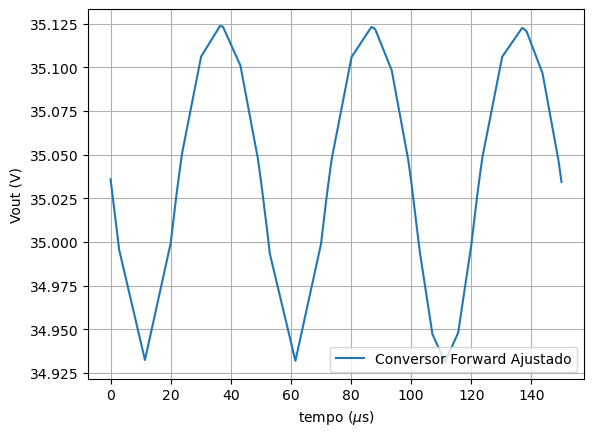

In [31]:
ForwA_raw = RawRead("Input Files/Forward Converter_Ajustado.raw")
time_ForwA = 1e6*ForwA_raw.get_trace("time").get_wave()
Vout_ForwA = ForwA_raw.get_trace("V(Vout)").get_wave()

plt.plot(time_ForwA, Vout_ForwA)

plt.legend(["Conversor Forward Ajustado"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()

In [32]:
Ix_ForwA  = ForwA_raw.get_trace("I(Lx)").get_wave()

dix_ForwA = 100*(np.max(Ix_ForwA) - np.min(Ix_ForwA))/np.average(Ix_ForwA)
dv_ForwA  = 100*(np.max(Vout_ForwA) - np.min(Vout_ForwA))/np.average(Vout_ForwA)

dA = [dix_ForwA, dv_ForwA]

print(dA)

[-67.5483930278887, 0.5489290440077351]


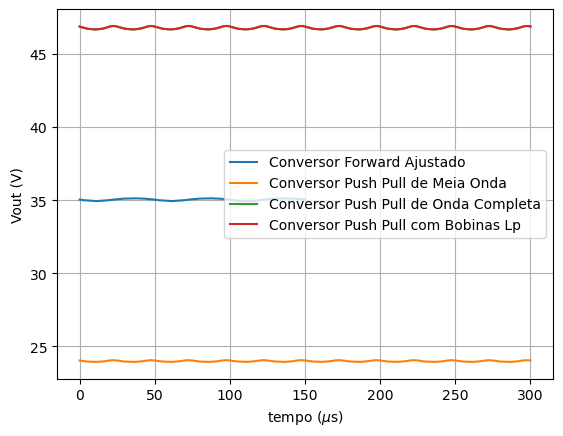

In [33]:
plt.plot(time_ForwA, Vout_ForwA)
plt.plot(time_Half, Vout_Half)
plt.plot(time_Full, Vout_Full)
plt.plot(time_Push, Vout_Push)

plt.legend(["Conversor Forward Ajustado", "Conversor Push Pull de Meia Onda",
            "Conversor Push Pull de Onda Completa", "Conversor Push Pull com Bobinas Lp"])

plt.xlabel("tempo ($\mu$s)")
plt.ylabel("Vout (V)")

plt.grid(True)
plt.show()